In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Observe a month of returns, fit to a distribution

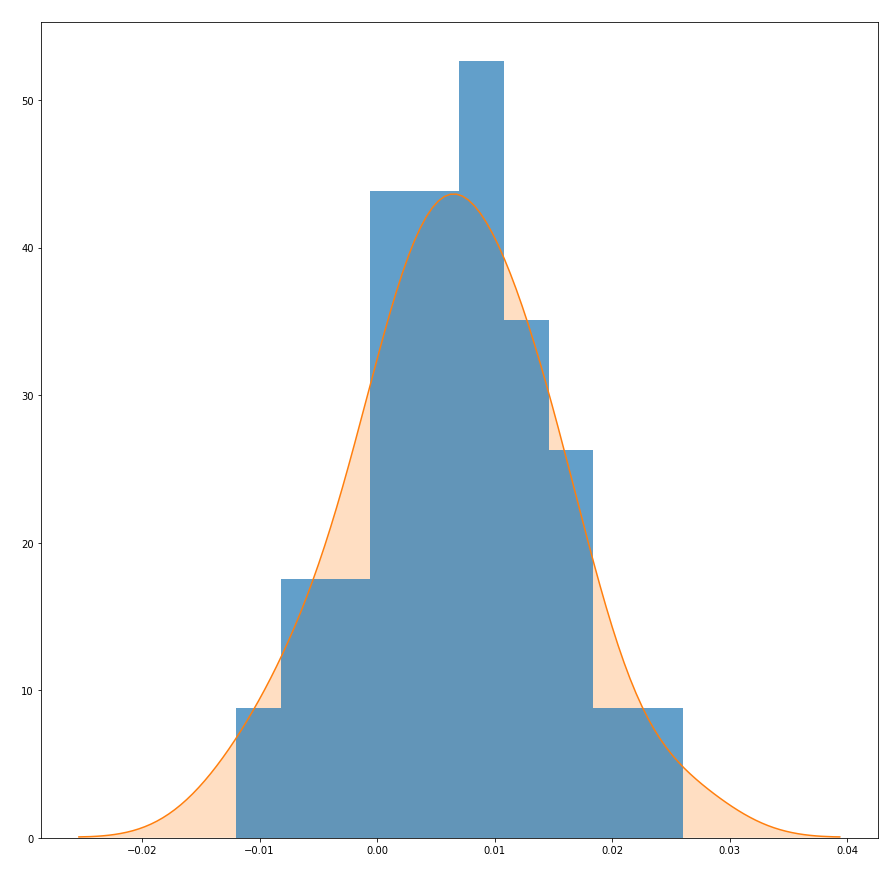

In [2]:
## Histogram and density plot of observations
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
np.random.seed(40)
observed_returns = sorted([round(np.random.normal(0.005,0.009),3) for x in range(30)])
plt.hist(observed_returns,alpha=0.7,density=True)
sns.kdeplot(observed_returns,shade=True)
plt.title("Histogram and Density Plot of Returns",c="white",loc='left')
plt.xlabel("Return",c="white")
plt.ylabel("Density",c="white")
plt.show()

In [3]:
## Approximately normally distributed, fit max likelihood estimates for mean and standard deviation
avg = pd.Series(observed_returns).mean()
sd = pd.Series(observed_returns).std()
print("Mean:",round(avg,4))
print("Standard Deviation:",round(sd,4))

Mean: 0.0066
Standard Deviation: 0.0083


## Simulate 5 days of random stock motion using fitted distribution

In [5]:
np.random.seed(30)
s_0 = 100
sim_paths = pd.DataFrame()
for i in range(1000):
    sim_i = [s_0]
    for x in range(1,6):
        sim_i.append(sim_i[x-1]*np.exp(np.random.normal(avg,sd)))
    sim_paths["Path "+str(i)] = sim_i

In [6]:
sim_paths

,Path 0,Path 1,Path 2,Path 3,Path 4,Path 5,Path 6,Path 7,Path 8,Path 9,...,Path 990,Path 991,Path 992,Path 993,Path 994,Path 995,Path 996,Path 997,Path 998,Path 999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.606820,100.913311,101.987915,101.297002,100.653994,102.020696,99.742610,99.947908,101.541723,101.515081,...,100.391151,100.554025,100.782509,99.881946,101.490579,100.302070,100.000988,99.124233,100.889811,101.134170
2,101.544440,100.131379,102.751604,101.722583,100.924229,103.916795,99.307849,101.541793,101.755634,103.809413,...,101.019486,100.626585,101.466584,99.690420,103.350074,100.024789,100.334602,99.639309,101.935654,101.869821
3,101.392093,102.127737,102.773828,102.851959,101.232595,104.025084,100.637785,100.591651,102.401179,104.185605,...,102.345469,101.668099,103.118756,99.385718,103.874249,100.360537,101.967912,100.707902,104.044746,101.660422
4,102.460038,102.915394,102.786537,101.751844,102.805097,105.571214,100.424956,100.665808,104.277085,104.535208,...,104.537980,101.407212,104.430231,99.369696,104.911933,102.151892,102.968567,101.837556,103.376828,101.865951
5,103.048791,102.644774,104.660622,103.223653,101.015115,104.775392,100.509159,102.046653,104.617560,103.551776,...,104.064493,102.951726,105.036361,99.032241,104.183180,101.778902,104.621390,102.502804,103.302511,103.028969


Text(0, 0.5, 'Stock Price')

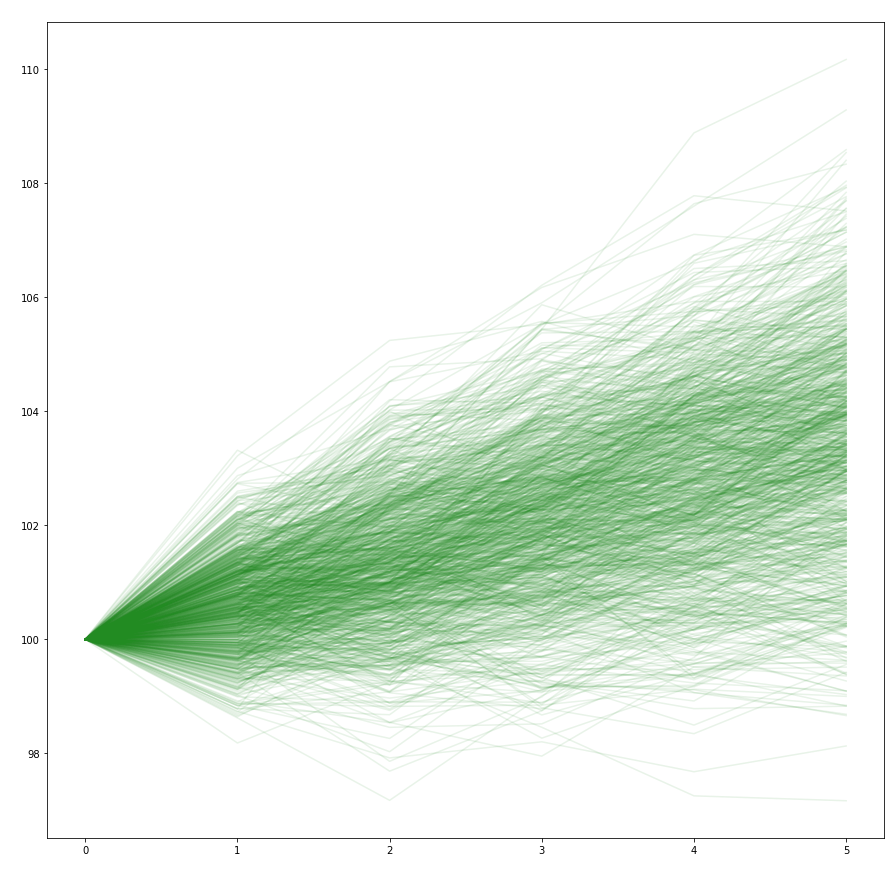

In [7]:
## Plot of paths
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
for x in sim_paths.columns:
    plt.plot(sim_paths.index, sim_paths[x],c = "forestgreen",alpha=0.1)
plt.title("Paths of Stock Price over 5 day Period",c="white",loc='left')
plt.xlabel("Time (days)",c="white")
plt.ylabel("Stock Price",c="white")

## Payoffs for a 5 day at the money Euro Call

In [8]:
## Can modify code to make it an American call or another option type/ strategy
K = 100
payoffs = []
for x in sim_paths.columns:
    payoffs.append(max(sim_paths[x][len(sim_paths)-1]-K,0))
payoffs = pd.Series(payoffs)
print("Summary Stats for Call Payoff")
payoffs.describe()

Summary Stats for Call Payoff


count    1000.000000
mean        3.469895
std         1.856933
min         0.000000
25%         2.158743
50%         3.474528
75%         4.708784
max        10.165736
dtype: float64

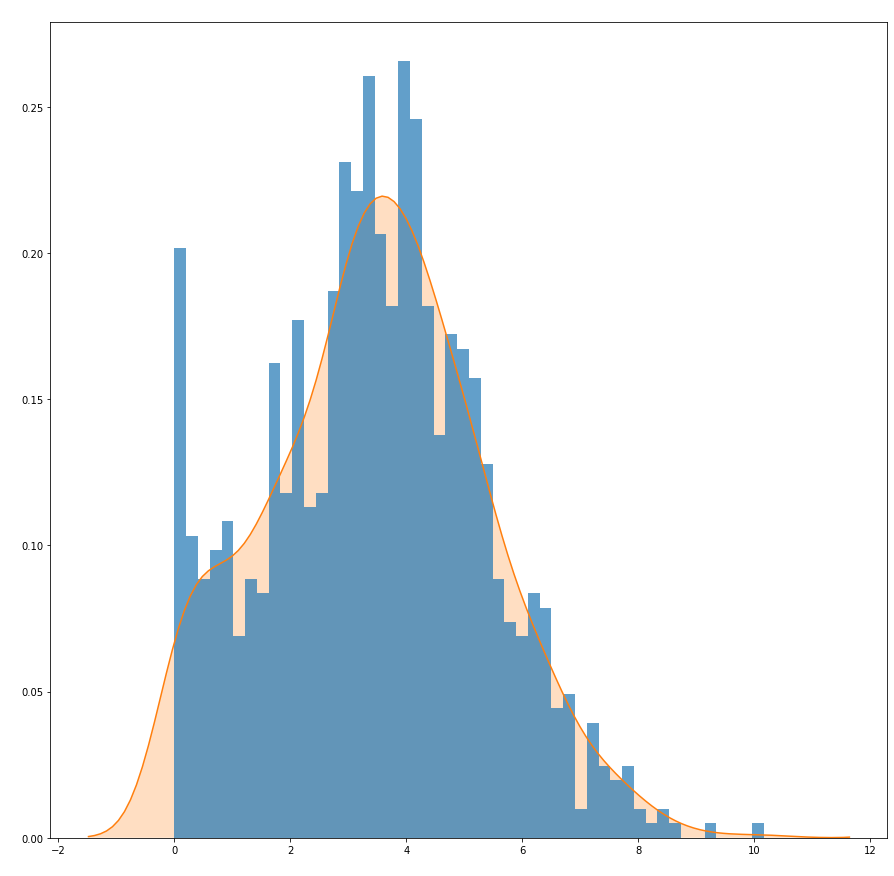

In [9]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.hist(payoffs, bins = 50, density=True,alpha=0.7)
sns.kdeplot(payoffs,shade=True)
plt.title("Histogram and Density Plot of Call Payoffs",c="white",loc='left')
plt.xlabel("Stock Price",c="white")
plt.ylabel("Density",c="white")
plt.show()

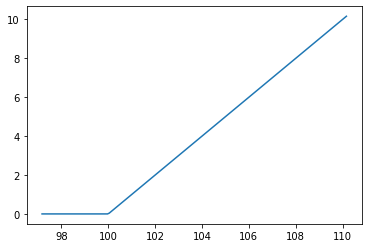

In [12]:
sim_price = sorted([sim_paths[x][len(sim_paths)-1] for x in sim_paths.columns])
sorted_payoffs = [max(sim_price[x]-K,0) for x in range(len(sim_price))]
plt.plot(sim_price,sorted_payoffs)